In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("C:/Users/hp/OneDrive/ドキュメント/Summer-Olympic-medals-1976-to-2008.xlsx")

In [5]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [51]:
df['Medal'].unique()

array(['Silver', 'Bronze', 'Gold', nan], dtype=object)

In [9]:
df.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [11]:
dff = df.dropna()

In [13]:
dff.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [15]:
dff.isnull().sum()

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64

In [53]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB


In [23]:
# Total medals won by each country
medals_by_country = dff.groupby('Country')['Medal'].count().sort_values(ascending=False)
medals_by_country

Country
United States    1992
Soviet Union     1021
Australia         798
Germany           691
China             679
                 ... 
Panama              1
Senegal             1
Sri Lanka           1
Sudan               1
Macedonia           1
Name: Medal, Length: 127, dtype: int64

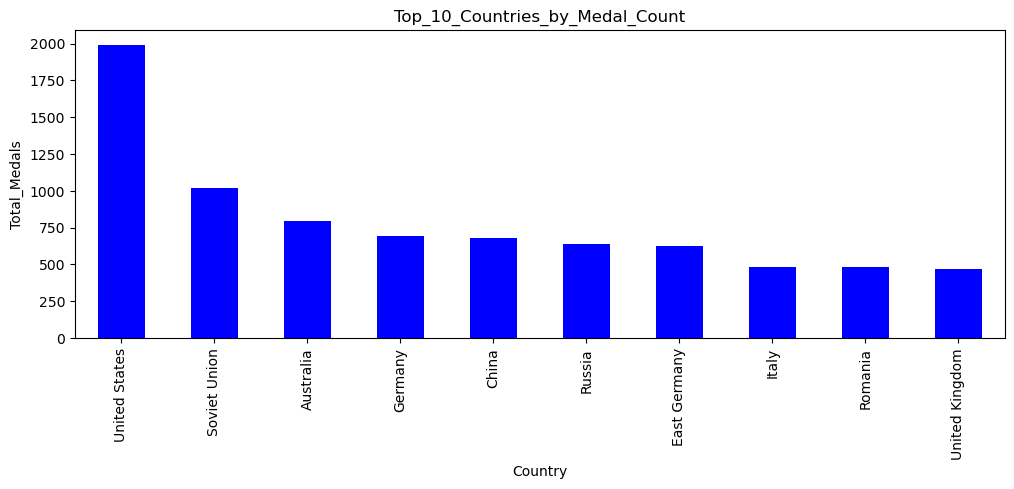

In [25]:
# Plotting the top 10 countries by medals
plt.figure(figsize=(12, 4))
medals_by_country.head(10).plot(kind='bar', color='blue')
plt.title("Top_10_Countries_by_Medal_Count")
plt.xlabel("Country")
plt.ylabel("Total_Medals")
plt.show()

In [27]:
# Grouping by Year and counting the medals won
medal_over_years = dff.groupby('Year')['Medal'].count()
medal_over_years

Year
1976.0    1305
1980.0    1387
1984.0    1459
1988.0    1546
1992.0    1705
1996.0    1859
2000.0    2015
2004.0    1998
2008.0    2042
Name: Medal, dtype: int64

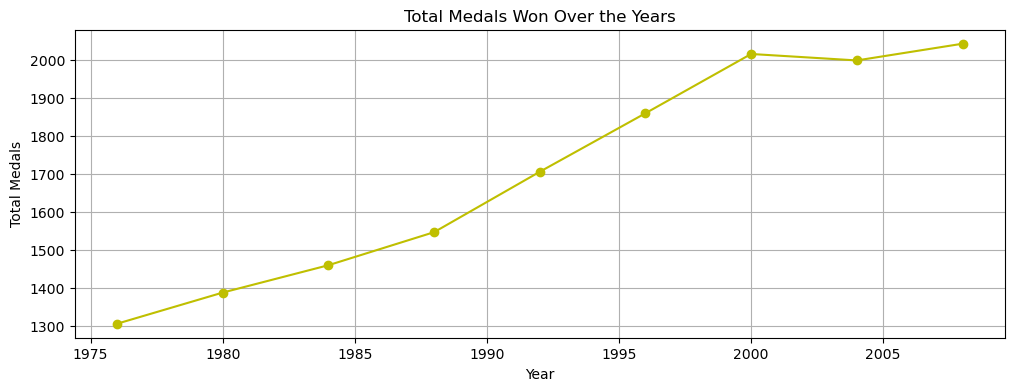

In [33]:
# Plotting the trend of medals won over the years
plt.figure(figsize=(12, 4))
plt.plot(medal_over_years.index,
medal_over_years.values,marker='o', linestyle='-', color='y')
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()


In [35]:
# Gender distribution in events
gender_distribution = dff['Gender'].value_counts()
gender_distribution

Gender
Men      9388
Women    5928
Name: count, dtype: int64

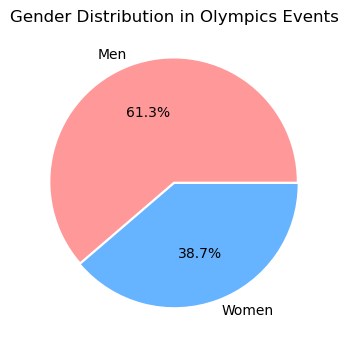

In [37]:
# Plotting gender distribution
plt.figure(figsize=(6, 4))
gender_distribution.plot(kind='pie',
                        autopct='%1.1f%%',
                        colors=['#ff9999','#66b3ff'], explode=[0.02, 0])
plt.title("Gender Distribution in Olympics Events")
plt.ylabel('')
plt.show()

In [39]:
# Group by Athlete and count the number of medals
athlete_medal_count = dff.groupby('Athlete')['Medal'].count().sort_values(ascending=False)
athlete_medal_count

Athlete
PHELPS, Michael        16
FISCHER, Birgit        12
NEMOV, Alexei          12
TORRES, Dara           12
THOMPSON, Jenny        12
                       ..
JAANSON, Jueri          1
JAANSON, Juri           1
JABLKOWSKI, Piotr       1
JABRAILOV, Elmadi       1
ÖRSTED, Hans-Henrik     1
Name: Medal, Length: 11337, dtype: int64

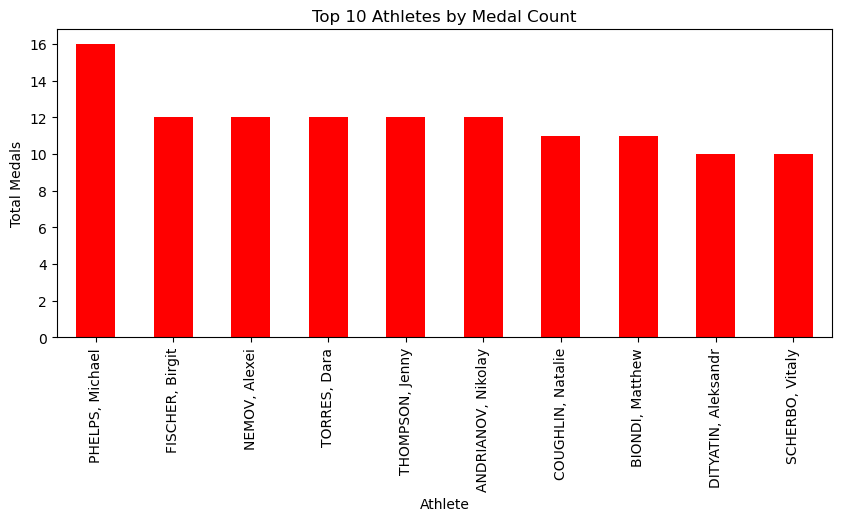

In [41]:
# Plotting the top 10 athletes with most medals
plt.figure(figsize=(10, 4))
athlete_medal_count.head(10).plot(kind='bar', color='Red')
plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.show()

In [45]:
dff['Medal'].unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [55]:
print(dff['Medal'].value_counts())


Medal
Bronze    5258
Gold      5042
Silver    5016
Name: count, dtype: int64


In [59]:
from sklearn.preprocessing import LabelEncoder

lebb = LabelEncoder()

dff['Country_Code'] = lebb.fit_transform(dff['Country_Code'])

dff['Sport'] = lebb.fit_transform(dff['Sport'])

dff['Gender'] = lebb.fit_transform(dff['Gender'])

dff['Event_gender'] = lebb.fit_transform(dff['Event_gender'])

dff['Medal'] = lebb.fit_transform(dff['Medal'])

C:\Users\hp\AppData\Local\Temp\ipykernel_18760\2859169296.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Country_Code'] = lebb.fit_transform(dff['Country_Code'])
C:\Users\hp\AppData\Local\Temp\ipykernel_18760\2859169296.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Sport'] = lebb.fit_transform(dff['Sport'])
C:\Users\hp\AppData\Local\Temp\ipykernel_18760\2859169296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [61]:
dff

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,0,Diving,3m springboard,"KÖHLER, Christa",1,40,East Germany,1,2
1,Montreal,1976.0,0,Diving,3m springboard,"KOSENKOV, Aleksandr",0,119,Soviet Union,0,0
2,Montreal,1976.0,0,Diving,3m springboard,"BOGGS, Philip George",0,121,United States,0,1
3,Montreal,1976.0,0,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",0,56,Italy,0,2
4,Montreal,1976.0,0,Diving,10m platform,"WILSON, Deborah Keplar",1,121,United States,1,0
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,27,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",0,37,France,0,0
15429,Beijing,2008.0,27,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",0,41,Georgia,0,1
15430,Beijing,2008.0,27,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",0,7,Azerbaijan,0,2
15431,Beijing,2008.0,27,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",0,37,France,0,1


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [67]:
# Features and Target
X = dff[['Country_Code','Sport','Gender','Event_gender']]
y = dff['Medal']

In [69]:
# Split the dataset into  training and testing sets

Xtrain , Xtest , ytrain , ytest = train_test_split(X,y,test_size = 0.2 , random_state=42)

In [71]:
Xtrain.shape

(12252, 4)

In [73]:
ytrain.shape

(12252,)

In [75]:
Xtest.shape

(3064, 4)

In [77]:
ytest.shape

(3064,)

In [79]:
model = LogisticRegression()


In [81]:
model.fit(Xtrain , ytrain)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
# Predict on the test data
ypred = model.predict(Xtest)
ypred

array([1, 1, 1, ..., 0, 1, 1])

In [89]:
print("Accuracy Score:", accuracy_score(ytest, ypred))
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred))
print("Classification Report:\n", classification_report(ytest,ypred))

Accuracy Score: 0.3410574412532637
Confusion Matrix:
 [[606 370  51]
 [598 402  43]
 [592 365  37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.59      0.43      1027
           1       0.35      0.39      0.37      1043
           2       0.28      0.04      0.07       994

    accuracy                           0.34      3064
   macro avg       0.32      0.34      0.29      3064
weighted avg       0.33      0.34      0.29      3064

